# Component Equations

pillar equation:

\begin{equation}\label{eq:main}
    dp/dt = r_p [p] - k_{p1} [p][q]
\end{equation}

Term explanation:  
$dp/dt$ : instantaneous rate of population growth of lineage p (sec$^{-1}$)  
$r_p$ : rate of growth of lineage p (sec$^{-1}$)  
$k_{p1}$ : hinder factor on growth rate exerted from q to p (sec$^{-1}$)  
$[p]$ : lineage p population size (no unit)  
$[q]$ : lineage q (interacting / competing lineage) population size (no unit)  

This is the core equation describing the "spatial competition" situation between p & q, with p as the target population described.  Another exact equation (except position of p & q swapped) will be used to describe target population as q.

population growth rate:

\begin{align}\label{eq:growth}
    r_p & = \dfrac{r_p|_{expt}}{P_p|_{expt}}\cdot P_p \nonumber\\
        & = \dfrac{r_p|_{expt}\cdot t_p|_{expt}}{J_p|_{expt}}\cdot\dfrac{J_p}{t_p}
\end{align}

Term explanation:  
$r_p$ : rate of growth of lineage p (sec$^{-1}$)  
$P_p$ : power gained by lineage p in model (W)  
$J_p$ : energy gained by lineage p in model (J)  
$t_p$ : hourly record of solar data (1 hour = 3600 sec) (sec)  
$r_p|_{expt}$ : rate of growth of lineage p reported in literature (sec$^{-1}$)  
$P_p|_{expt}$ : power gained by lineage p reported in literature (W)  
$J_p|_{expt}$ : energy gained by lineage p reported in literature (J)  
$t_p|_{expt}$ : time used in reported experiment to obtain $J_p|_{expt}$ (sec)  

Growth rate used in model is an estimate from past literature assuming linear relationship between power gained (per cell) and growth rate.

competition coefficient:

\begin{align}\label{eq:compete}
    k_{p1} & = \dfrac{P_q}{P_p + P_q}\cdot r_p \nonumber\\
           & = \dfrac{J_q J_p}{(J_p + J_q)\cdot t_p}\cdot \dfrac{r_p|_{expt}\cdot t_p|_{expt}}{J_p|_{expt}}
\end{align}

Term explanation:  
$k_{p1}$ : hinder factor on growth rate exerted from q to p (sec$^{-1}$)  
$r_p$ : rate of growth of lineage p (sec$^{-1}$)  
$P_p$ : power gained by lineage p in model (W)  
$P_q$ : power gained by lineage q in model (W)  
$J_p$ : energy gained by lineage p in model (J)  
$J_q$ : energy gained by lineage q in model (J)  
$t_p$ : hourly record of solar data (1 hour = 3600 sec) (sec)  
$r_p|_{expt}$ : rate of growth of lineage p reported in literature (sec$^{-1}$)  
$J_p|_{expt}$ : energy gained by lineage p reported in literature (J)  
$t_p|_{expt}$ : time used in reported experiment to obtain $J_p|_{expt}$ (sec)  

This equation was calculating how much hinder do the other competing lineage exert on the target population if only advantage can be gained by gaining more energy (per cell) within the same time period.

Overall equation (Eq.1+2+3):
\begin{align}\label{eq:overall}
    \dfrac{dp}{dt} & = [p]\cdot(r_p - k_{p1}[q]) \nonumber\\
                   & = [p]\cdot r_p(1-\dfrac{P_q}{P_p + P_q}\cdot[q]) \nonumber\\
                   & = [p]\cdot(\dfrac{r_p|_{expt}\cdot t_p|_{expt}}{J_p|_{expt}})\cdot\dfrac{J_p}{t_p}\cdot(1-\dfrac{J_q[q]}{J_p + J_q}) \nonumber \\
                   & = (\dfrac{r_p|_{expt}\cdot t_p|_{expt}}{J_p|_{expt}})(1-\dfrac{J_q[q]}{J_p + J_q})(\dfrac{J_p}{t_p})[p]
\end{align}

This equation describes the instantaneous growth rate of lineage p ($\dfrac{dp}{dt}$) by combining equations 1 to 3.  There are a constant coefficient ($\dfrac{r_p|_{expt}\cdot t_p|_{expt}}{J_p|_{expt}}$), a variable coefficient [$(1-\dfrac{J_q[q]}{J_p+J_q})(\dfrac{J_p}{t_p})$] and the target population [$p$].

# Model

In [1]:
import scipy as sc
import scipy.integrate as integrate
import matplotlib.pylab as p

## Eco-bacterial cell first attempt

In [2]:
def ebc(pops,
        Jp=1, Jq=1,
        T_int=3600,
        JpEXPT=8, RpEXPT=1, TpEXPT=50,
        JqEXPT=8, RqEXPT=1, TqEXPT=50):
    """Competition model"""
    p=pops[0]
    q=pops[1]
    
    dpdt = (RpEXPT * TpEXPT / JpEXPT) * (1 - Jq * q / (Jp + Jq)) * (Jp / T_int) * p
    dqdt = (RqEXPT * TqEXPT / JqEXPT) * (1 - Jp * p / (Jp + Jq)) * (Jq / T_int) * q
    
    return sc.array([dpdt, dqdt])

/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Competition population dynamics')

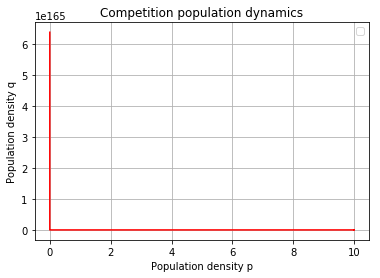

In [3]:
t=sc.linspace(0,1500,1e5) # timescale: start, end, interval

pops, infodict=integrate.odeint(ebc, sc.array([10,10]), t, full_output=True) # modeling

f1=p.figure(num=1);f1
p.plot(pops[:,1],pops[:,0], 'r-')
p.grid()
p.legend(loc="best")
p.xlabel("Population density p")
p.ylabel("Population density q")
p.title("Competition population dynamics")

/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Competition population dynamics')

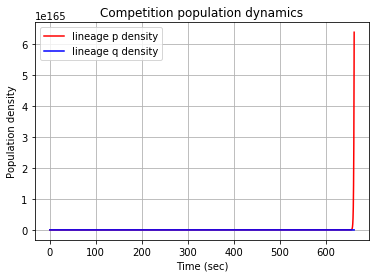

In [4]:
t=sc.linspace(0,1500,1e5) # timescale: start, end, interval

pops, infodict=integrate.odeint(ebc, sc.array([10,10]), t, full_output=True) # modeling
#pops # show population py-listZ

f1=p.figure(num=1);f1
p.plot(t,pops[:,0], 'r-', label="lineage p density")
p.plot(t,pops[:,1], 'b-', label="lineage q density")
p.grid()
p.legend(loc="best")
p.xlabel("Time (sec)")
p.ylabel("Population density")
p.title("Competition population dynamics")

## Competitive Lotka-Volterra equations

In [8]:
def LV_comp(pops, r1=2, r2=1, a12=1, a21=1, K1=100, K2=100, t=0):
    """Competitive Lotka-Volterra equations"""
    x1=pops[0]
    x2=pops[1]
    dx1dt=r1*x1*(1-(x1+a12*x2)/K1)
    dx2dt=r2*x2*(1-(x2+a21*x1)/K2)
    return(sc.array([dx1dt,dx2dt]))

/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Competition population dynamics')

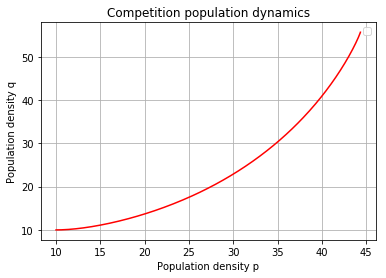

In [9]:
t=sc.linspace(0,1500,1e5) # timescale: start, end, interval

pops, infodict=integrate.odeint(LV_comp, sc.array([10,10]), t, full_output=True) # modeling

f1=p.figure(num=1);f1
p.plot(pops[:,1],pops[:,0], 'r-')
p.grid()
p.legend(loc="best")
p.xlabel("Population density p")
p.ylabel("Population density q")
p.title("Competition population dynamics")

/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Competition population dynamics')

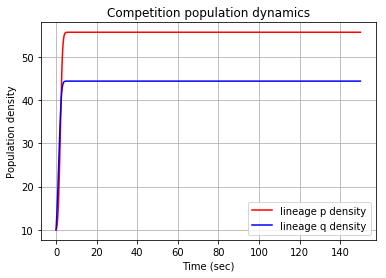

In [10]:
t=sc.linspace(0,150,1e5) # timescale: start, end, interval

pops, infodict=integrate.odeint(LV_comp, sc.array([10,10]), t, full_output=True) # modeling
#pops # show population py-listZ

f1=p.figure(num=1);f1
p.plot(t,pops[:,0], 'r-', label="lineage p density")
p.plot(t,pops[:,1], 'b-', label="lineage q density")
p.grid()
p.legend(loc="best")
p.xlabel("Time (sec)")
p.ylabel("Population density")
p.title("Competition population dynamics")

# Parameters, units, meaning

parameter | raw unit | unit use in model | meaning | ref
--- | --- | --- | --- | ---
$r_p|_{expt}$ | hour$^{-1}$ | sec$^{-1}$ | population growth rate in lineage p in a growth rate experiment | zavvrel2017phenotypic
$J_p|_{expt}$ | NA | J | expected energy gained per lineage p cell in a growth rate experiment | NA
$t_p|_{expt}$ | hour | sec | reported time to optain $r_p|_{expt}$ | zavvrel2017phenotypic
$r_q|_{expt}$ | hour$^{-1}$ | sec$^{-1}$ | population growth rate in a lineage q growth rate experiment | billi1998method
$J_q|_{expt}$ | NA | J | expected energy gained per lineage q cell in a growth rate experiment | NA
$t_q|_{expt}$ | hour | sec | reported time to optain $r_q|_{expt}$ | billi1998method
$size_p|_{expt}$ | $\mu$m | m | mean cell size for lineage p | zavvrel2017phenotypic
$size_q|_{expt}$ | $\mu$m | m | mean cell size for lineage q | [microbewiki](https://microbewiki.kenyon.edu/index.php/Chroococcidiopsis#Cell_Structure.2C_Metabolism_and_Life_Cycle)
$size_m|_{expt}$ | cm | m | size for button mushroom pileus | [wikipedia](https://en.wikipedia.org/wiki/Agaricus_bisporus#Description)